In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
%matplotlib inline

In [2]:
#import the data and create the dataframe
df = pd.read_csv("../input/jakartaairpolution/indeks-standar-pencemar-udara-di-spku-dataset.csv")
#remove all the spaces from the column names
df.columns = list(map(lambda a: a.lstrip(), df.columns))

In [3]:
#drop useless values
df.drop(["tanggal"],axis=1,inplace=True)
df.drop(["stasiun"],axis=1,inplace=True)
pd.set_option("display.max_columns", None)

In [4]:
#drop any rows that have 7 in the rebounds column
df = df[df.pm10 != "---"]
df = df[df.so2 != "---"]
df = df[df.o3 != "---"]
df = df[df.co != "---"]
df = df[df.no2 != "---"]
df = df[df.critical != "---"]
df = df[df.categori != "---"]
df.dropna(subset = ["critical"], inplace=True)
df.dropna(subset = ["max"], inplace=True)
df= df[df['max'] != 0]

df

,pm10,so2,co,o3,no2,max,critical,categori
0,30,20,10,32,9,32.0,O3,BAIK
1,27,22,12,29,8,29.0,O3,BAIK
2,39,22,14,32,10,39.0,PM10,BAIK
3,34,22,14,38,10,38.0,O3,BAIK
4,35,22,12,31,9,35.0,PM10,BAIK
...,...,...,...,...,...,...,...,...
1822,29,31,9,28,2,31.0,PM25,BAIK
1823,24,27,7,18,3,27.0,PM25,BAIK
1826,22,33,5,35,3,35.0,CO,BAIK
1828,16,7,3,21,2,21.0,CO,BAIK


In [5]:
#check if there's Na value
df.isnull().sum()

pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

In [6]:
#visualize the data frame
df.head(500)

,pm10,so2,co,o3,no2,max,critical,categori
0,30,20,10,32,9,32.0,O3,BAIK
1,27,22,12,29,8,29.0,O3,BAIK
2,39,22,14,32,10,39.0,PM10,BAIK
3,34,22,14,38,10,38.0,O3,BAIK
4,35,22,12,31,9,35.0,PM10,BAIK
...,...,...,...,...,...,...,...,...
566,111,31,25,58,10,111.0,PM10,TIDAK SEHAT
567,66,27,13,51,7,66.0,PM10,SEDANG
569,64,26,25,53,9,64.0,PM10,SEDANG
572,59,20,14,60,9,60.0,O3,SEDANG


In [7]:
print(df.to_string())

     pm10  so2   co   o3  no2    max critical     categori
0      30   20   10   32    9   32.0       O3         BAIK
1      27   22   12   29    8   29.0       O3         BAIK
2      39   22   14   32   10   39.0     PM10         BAIK
3      34   22   14   38   10   38.0       O3         BAIK
4      35   22   12   31    9   35.0     PM10         BAIK
5      46   23   16   32    9   46.0     PM10         BAIK
6      37   23   26   33   11   37.0     PM10         BAIK
7      41   26   20   30   11   41.0     PM10         BAIK
8      52   23   29   24   12   52.0     PM10       SEDANG
9      24   24   18   25    8   25.0       O3         BAIK
10     34   31   25   23    8   34.0     PM10         BAIK
11     27   23    9   33    4   33.0       O3         BAIK
12     33   26   12   36    8   36.0       O3         BAIK
13     34   28   13   27    7   34.0     PM10         BAIK
14     29   22   13   36    8   36.0       O3         BAIK
15     52   60   19   30    8   60.0      SO2       SEDA

# visualize the data

<AxesSubplot:xlabel='categori', ylabel='count'>

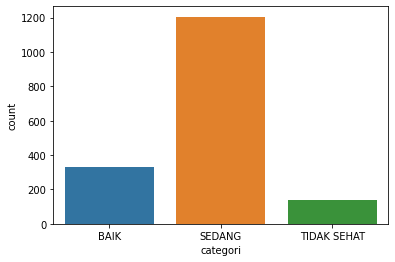

In [8]:
plt.figure(facecolor='white')
sns.countplot(x=df["categori"],label="air categori")

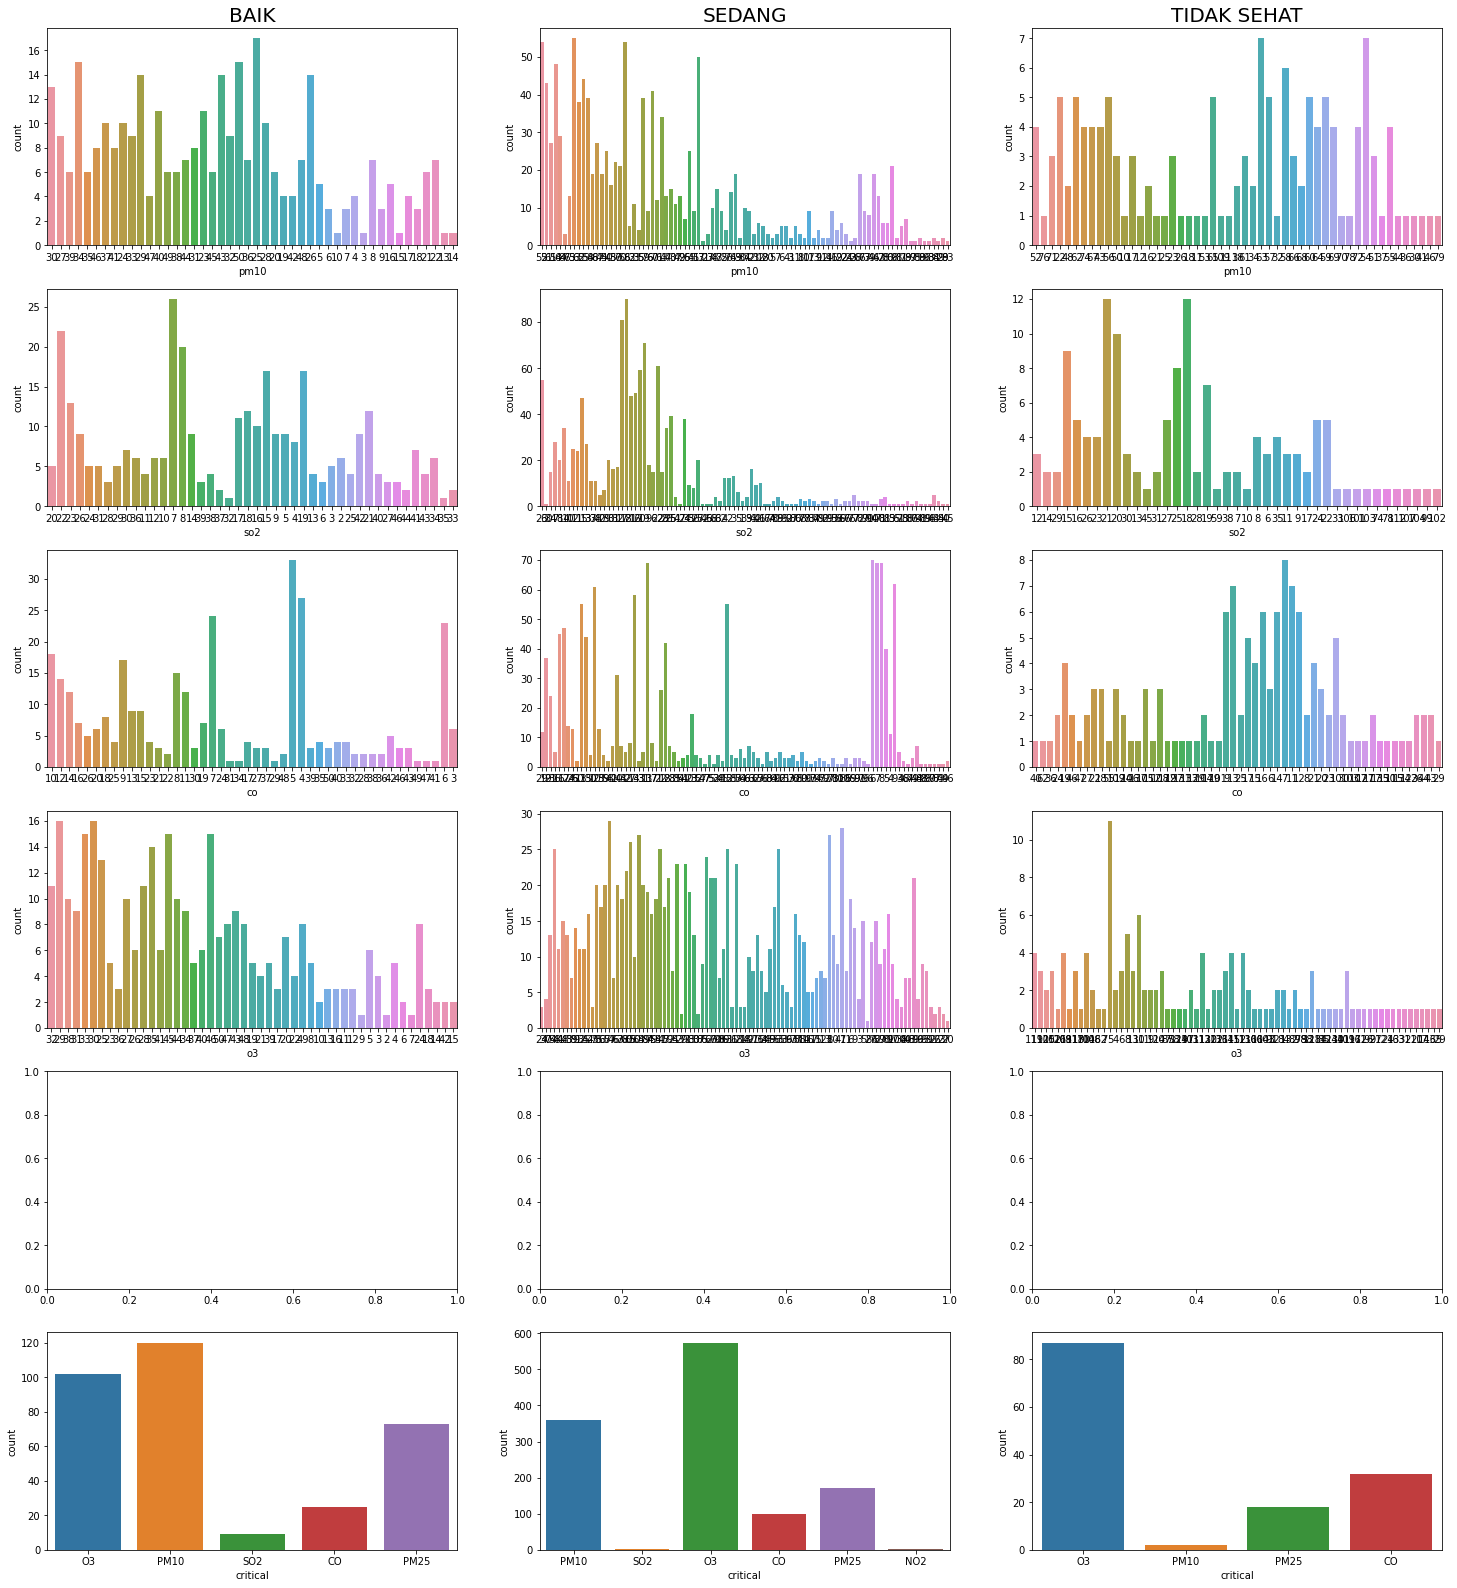

In [9]:
# creating charts
cols = ['BAIK','SEDANG','TIDAK SEHAT']
var_to_plot = ["pm10","so2","co","o3","max","critical"]
types = df[var_to_plot].dtypes

colors = list(sns.color_palette("Paired"))
fig, ax = plt.subplots(nrows=len(var_to_plot), ncols=3, figsize=(25,28))
fig.set_facecolor('white')

for i,var in enumerate(zip(var_to_plot,types)):
    
    if var[1] =='O':
        
        sns.countplot(x=df.loc[df['categori'] == 'BAIK'][var[0]],label=var[0],ax=ax[i,0])
        sns.countplot(x=df.loc[df['categori'] == 'SEDANG'][var[0]],label=var[0],ax=ax[i,1])
        sns.countplot(x=df.loc[df['categori'] == 'TIDAK SEHAT'][var[0]],label=var[0],ax=ax[i,2])

for ax, col in zip(ax[0], cols):
    ax.set_title(col,fontdict={'fontsize':20})

plt.show()

# data pre-processing

In [10]:

df.dropna(subset = ["o3"], inplace=True)
df.dropna(subset = ["no2"], inplace=True)
df.dropna(subset = ["max"], inplace=True)
df.dropna(subset = ["critical"], inplace=True)
df.dropna(subset = ["categori"], inplace=True)

In [11]:
#turn binary attributes into 0 and 1
df['categori']=df['categori'].map({'BAIK': 1, 'SEDANG': 2, 'TIDAK SEHAT': 3})
df['critical']=df['critical'].map({'O3': 1, 'PM10': 2, 'SO2': 3,'PM25':4,'CO':5})


In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_att = ["critical"]
num_att = ["pm10","so2","co","o3","no2","max"]


# encode all the categorial features
transformer = ColumnTransformer([
    ("num_attrs", StandardScaler(), num_att),
    ("cat_attrs", OneHotEncoder(), cat_att)]
)

In [13]:
df.isnull().values.any()

import numpy as np

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()

df = df.dropna(axis=1)

print(df.to_string())

      index pm10  so2   co   o3  no2    max  critical  categori
0         0   30   20   10   32    9   32.0       1.0         1
1         1   27   22   12   29    8   29.0       1.0         1
2         2   39   22   14   32   10   39.0       2.0         1
3         3   34   22   14   38   10   38.0       1.0         1
4         4   35   22   12   31    9   35.0       2.0         1
5         5   46   23   16   32    9   46.0       2.0         1
6         6   37   23   26   33   11   37.0       2.0         1
7         7   41   26   20   30   11   41.0       2.0         1
8         8   52   23   29   24   12   52.0       2.0         2
9         9   24   24   18   25    8   25.0       1.0         1
10       10   34   31   25   23    8   34.0       2.0         1
11       11   27   23    9   33    4   33.0       1.0         1
12       12   33   26   12   36    8   36.0       1.0         1
13       13   34   28   13   27    7   34.0       2.0         1
14       14   29   22   13   36    8   3

In [14]:
from sklearn.model_selection import train_test_split
    
X = df.drop('categori', axis=1)
y = df.categori

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

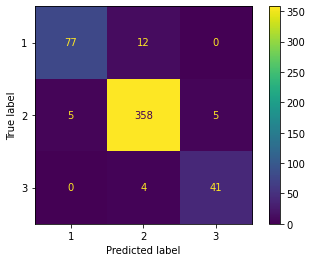

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# class_names = "Air Quality"
classifier = SVC(kernel="linear", C=0.01).fit(X_train, y_train)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

disp.plot()
plt.show()

In [16]:
from sklearn.metrics import classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

print_score(classifier, X_train, y_train, X_test, y_test, train=True)
print_score(classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.38%
_______________________________________________
CLASSIFICATION REPORT:
                    1           2          3  accuracy    macro avg  \
precision    0.946429    0.957845   0.934783  0.953846     0.946352   
recall       0.883333    0.978469   0.914894  0.953846     0.925565   
f1-score     0.913793    0.968047   0.924731  0.953846     0.935524   
support    240.000000  836.000000  94.000000  0.953846  1170.000000   

           weighted avg  
precision      0.953651  
recall         0.953846  
f1-score       0.953438  
support     1170.000000  
_______________________________________________
Confusion Matrix: 
 [[212  28   0]
 [ 12 818   6]
 [  0   8  86]]

Test Result:
Accuracy Score: 94.82%
_______________________________________________
CLASSIFICATION REPORT:
                   1           2          3  accuracy   macro avg  \
precision   0.939024    0.957219   0.891304  0.948207    0.929183   
recall      0.865169    0.972826   0.911111  0